### =============================
                        ### IBM EMPLOYEE CHURN PREDICTION
                        ### Author: Reddy
                                 ================================

In [1]:
# 1️⃣ Cleaning & Feature Engineering ✅
# 2️⃣ Visualization (EDA v2) 🔄
# 3️⃣ Encoding
# 4️⃣ Train–test split
# 5️⃣ Baseline 4 models
# 6️⃣ 🔥 SHAP RUN #1
# 7️⃣ Class balancing
# 8️⃣ Scaling
# 9️⃣ Hyperparameter tuning
# 🔟 Final model selection
# 1️⃣1️⃣ 🔥 SHAP RUN #2
# 1️⃣2️⃣ Threshold tuning
# 1️⃣3️⃣ (Optional) Calibration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sns.set_style(style='whitegrid')

<!-- 🔹 STEP 1 — RAW DATA
Monthly Ola Data

🔹 STEP 2 — AGGREGATION
One row per employee

🔹 STEP 3 — EDA 
Visualize REAL churn patterns  
No class weights  
No SMOTE  
No resampling  

🔹 STEP 4 — FEATURE ENGINEERING
Create tenure, salary bands, performance buckets

🔹 STEP 5 — TRAIN–TEST SPLIT
Keep true imbalance  
stratify=y

🔹 STEP 6 — MODEL TRAINING
Apply class weights or SMOTE  
Tune threshold  
Optimize recall   -->


## 1. Dataset Understanding & Cleaning

In [4]:
df_raw = pd.read_csv('../data/ibm_churn.csv')

In [5]:
df_raw.shape
# 1470 rows and 35 features columns

(1470, 35)

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df_raw.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [8]:
df_raw.rename(columns={
    'EmployeeNumber': 'Driver_ID',
    'MonthlyIncome': 'Income',
    'JobRole': 'Designation',
    'JobLevel': 'Grade',
    'YearsAtCompany': 'Tenure_Years',
    'TotalWorkingYears': 'Total_Experience_Years',
    'PerformanceRating': 'Quarterly_Rating',
    'DistanceFromHome': 'Commute_Distance',
    'NumCompaniesWorked': 'Previous_Companies',
    'PercentSalaryHike': 'Salary_Hike_Percent',
    'TrainingTimesLastYear': 'Trainings_Last_Year',
    'YearsInCurrentRole': 'Years_In_Current_Role',
    'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
    'YearsWithCurrManager': 'Years_With_Current_Manager',
    'BusinessTravel': 'Travel_Frequency',
    'WorkLifeBalance': 'Work_Life_Balance',
    'EnvironmentSatisfaction': 'Environment_Satisfaction',
    'JobSatisfaction': 'Job_Satisfaction',
    'RelationshipSatisfaction': 'Relationship_Satisfaction',
    'MaritalStatus': 'Marital_Status',
    'EducationField': 'Education_Field'
}, inplace=True)


In [9]:
df_clean = df_raw.copy()

In [10]:
df_clean.tail(5)

,Age,Attrition,Travel_Frequency,DailyRate,Department,Commute_Distance,Education,Education_Field,EmployeeCount,Driver_ID,...,Relationship_Satisfaction,StandardHours,StockOptionLevel,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Tenure_Years,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   Travel_Frequency            1470 non-null   object
 3   DailyRate                   1470 non-null   int64 
 4   Department                  1470 non-null   object
 5   Commute_Distance            1470 non-null   int64 
 6   Education                   1470 non-null   int64 
 7   Education_Field             1470 non-null   object
 8   EmployeeCount               1470 non-null   int64 
 9   Driver_ID                   1470 non-null   int64 
 10  Environment_Satisfaction    1470 non-null   int64 
 11  Gender                      1470 non-null   object
 12  HourlyRate                  1470 non-null   int64 
 13  JobInvolvement              1470 non-null   int6

In [12]:
df_clean.shape

(1470, 35)

In [13]:
low_priority_cols = [
    'DailyRate',
    'HourlyRate',
    'MonthlyRate',
    'Driver_ID','EmployeeCount' ,'Over18' ,'StandardHours'
]

df_clean.drop(columns=low_priority_cols, inplace=True)


In [14]:
df_clean.shape

(1470, 28)

In [15]:
# some use less features are droped as they have least importance
# 'DailyRate','HourlyRate','MonthlyRate','Driver_ID'

In [16]:
df_clean.isnull().sum()

Age                           0
Attrition                     0
Travel_Frequency              0
Department                    0
Commute_Distance              0
Education                     0
Education_Field               0
Environment_Satisfaction      0
Gender                        0
JobInvolvement                0
Grade                         0
Designation                   0
Job_Satisfaction              0
Marital_Status                0
Income                        0
Previous_Companies            0
OverTime                      0
Salary_Hike_Percent           0
Quarterly_Rating              0
Relationship_Satisfaction     0
StockOptionLevel              0
Total_Experience_Years        0
Trainings_Last_Year           0
Work_Life_Balance             0
Tenure_Years                  0
Years_In_Current_Role         0
Years_Since_Last_Promotion    0
Years_With_Current_Manager    0
dtype: int64

In [17]:
# clearly the dataset is clear with zero null values

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   Travel_Frequency            1470 non-null   object
 3   Department                  1470 non-null   object
 4   Commute_Distance            1470 non-null   int64 
 5   Education                   1470 non-null   int64 
 6   Education_Field             1470 non-null   object
 7   Environment_Satisfaction    1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   JobInvolvement              1470 non-null   int64 
 10  Grade                       1470 non-null   int64 
 11  Designation                 1470 non-null   object
 12  Job_Satisfaction            1470 non-null   int64 
 13  Marital_Status              1470 non-null   obje

In [19]:
df_clean.head()

,Age,Attrition,Travel_Frequency,Department,Commute_Distance,Education,Education_Field,Environment_Satisfaction,Gender,JobInvolvement,...,Quarterly_Rating,Relationship_Satisfaction,StockOptionLevel,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Tenure_Years,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2


In [20]:
# understanding

In [21]:
df_clean['Attrition'].value_counts(normalize=True)*100
# clearly less percentageof employees are churned around 16.122%

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [22]:
df_clean['Environment_Satisfaction'].value_counts(normalize=True)*100
# 40% employe are not feeling good environment and 30% are average and remaining 30 % are feeling good

Environment_Satisfaction
3    30.816327
4    30.340136
2    19.523810
1    19.319728
Name: proportion, dtype: float64

In [23]:
df_clean['Gender'].value_counts(normalize=True)*100
# clearly more number of employees are Male 60%

Gender
Male      60.0
Female    40.0
Name: proportion, dtype: float64

In [24]:
df_clean['Travel_Frequency'].value_counts(normalize=True)*100

Travel_Frequency
Travel_Rarely        70.952381
Travel_Frequently    18.843537
Non-Travel           10.204082
Name: proportion, dtype: float64

In [25]:
df_clean['Department'].value_counts(normalize=True)*100

Department
Research & Development    65.374150
Sales                     30.340136
Human Resources            4.285714
Name: proportion, dtype: float64

In [26]:
df_clean['Commute_Distance'].value_counts(normalize=True)*100
# the commute distance values are in rang btw 1 - 30 km  

Commute_Distance
2     14.353741
1     14.149660
10     5.850340
9      5.782313
3      5.714286
7      5.714286
8      5.442177
5      4.421769
4      4.353741
6      4.013605
16     2.176871
11     1.972789
24     1.904762
29     1.836735
23     1.836735
15     1.768707
18     1.768707
20     1.700680
25     1.700680
26     1.700680
28     1.564626
19     1.496599
14     1.428571
12     1.360544
17     1.360544
22     1.292517
13     1.292517
21     1.224490
27     0.816327
Name: proportion, dtype: float64

In [27]:
df_clean['Education'].value_counts(normalize=True)*100
# clearly higly educated employes are present in the company 

Education
3    38.911565
4    27.074830
2    19.183673
1    11.564626
5     3.265306
Name: proportion, dtype: float64

In [28]:
df_clean['Education_Field'].value_counts(normalize=True)*100
# clearly the life sciences and medical are most of the  education fields of emoployee

Education_Field
Life Sciences       41.224490
Medical             31.564626
Marketing           10.816327
Technical Degree     8.979592
Other                5.578231
Human Resources      1.836735
Name: proportion, dtype: float64

In [29]:
df_clean['Designation'].value_counts(normalize=True)*100
# major roles are sales Excecutive and research scientist and aboratory technician 
# Hr and research director sales representative are lesss 

Designation
Sales Executive              22.176871
Research Scientist           19.863946
Laboratory Technician        17.619048
Manufacturing Director        9.863946
Healthcare Representative     8.911565
Manager                       6.938776
Sales Representative          5.646259
Research Director             5.442177
Human Resources               3.537415
Name: proportion, dtype: float64

In [30]:
df_clean['Job_Satisfaction'].value_counts(normalize=True)*100
# 40 % of employe are having the low  and 30% are of  medium which is the key factor of churn

Job_Satisfaction
4    31.224490
3    30.068027
1    19.659864
2    19.047619
Name: proportion, dtype: float64

In [31]:
df_clean['JobInvolvement'].value_counts(normalize=True)*100
# 30 % of employees are very less involment intheir job
# 60 % of averagly involing in their jobs 

JobInvolvement
3    59.047619
2    25.510204
4     9.795918
1     5.646259
Name: proportion, dtype: float64

In [32]:
df_clean['Work_Life_Balance'].value_counts(normalize=True)*100
# the employes having overtime in offices (30%) are unable to balance the work life
# 60% of employee are balancing and 25 % are unable which seems to be factor for the churn

Work_Life_Balance
3    60.748299
2    23.401361
4    10.408163
1     5.442177
Name: proportion, dtype: float64

In [33]:
df_clean['OverTime'].value_counts(normalize=True)*100
# 28% of the employes are having the overtime in the office which is the key factor of churn

OverTime
No     71.70068
Yes    28.29932
Name: proportion, dtype: float64

In [34]:
df_clean['Salary_Hike_Percent'].value_counts(normalize=True)*100
# low salary hike percent s( 11 to 15 %) results more churn possibilities

Salary_Hike_Percent
11    14.285714
13    14.217687
14    13.673469
12    13.469388
15     6.870748
18     6.054422
17     5.578231
16     5.306122
19     5.170068
22     3.809524
20     3.741497
21     3.265306
23     1.904762
24     1.428571
25     1.224490
Name: proportion, dtype: float64

In [35]:
df_clean['Quarterly_Rating'].value_counts(normalize=True) *100
# 84% of the employee are average Quarterly_Rated 
#  15 % are higly rated implies quaterly job involment is high 

Quarterly_Rating
3    84.62585
4    15.37415
Name: proportion, dtype: float64

In [36]:
df_clean['Tenure_Years'].value_counts(normalize=True)*100
# mostly employee are working for 1 -5  and later the churning starts may be contract based

Tenure_Years
5     13.333333
1     11.632653
3      8.707483
2      8.639456
10     8.163265
4      7.482993
7      6.122449
9      5.578231
8      5.442177
6      5.170068
0      2.993197
11     2.176871
20     1.836735
13     1.632653
15     1.360544
14     1.224490
22     1.020408
21     0.952381
12     0.952381
18     0.884354
16     0.816327
19     0.748299
17     0.612245
24     0.408163
33     0.340136
26     0.272109
25     0.272109
31     0.204082
32     0.204082
27     0.136054
29     0.136054
36     0.136054
23     0.136054
37     0.068027
40     0.068027
34     0.068027
30     0.068027
Name: proportion, dtype: float64

In [37]:
df_clean['Years_Since_Last_Promotion'] .value_counts(normalize=True)*100
# about to 40% of employes are good promotions which is good thing for the employes and company

Years_Since_Last_Promotion
0     39.523810
1     24.285714
2     10.816327
7      5.170068
4      4.149660
3      3.537415
5      3.061224
6      2.176871
11     1.632653
8      1.224490
9      1.156463
15     0.884354
13     0.680272
12     0.680272
14     0.612245
10     0.408163
Name: proportion, dtype: float64

In [38]:
df_clean['Years_In_Current_Role'] .value_counts(normalize=True)*100
# its results good promotions to the employees

Years_In_Current_Role
2     25.306122
0     16.598639
7     15.102041
3      9.183673
4      7.074830
8      6.054422
9      4.557823
1      3.877551
6      2.517007
5      2.448980
10     1.972789
11     1.496599
13     0.952381
14     0.748299
12     0.680272
15     0.544218
16     0.476190
17     0.272109
18     0.136054
Name: proportion, dtype: float64

In [39]:
# parsing the datatypes

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   object
 2   Travel_Frequency            1470 non-null   object
 3   Department                  1470 non-null   object
 4   Commute_Distance            1470 non-null   int64 
 5   Education                   1470 non-null   int64 
 6   Education_Field             1470 non-null   object
 7   Environment_Satisfaction    1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   JobInvolvement              1470 non-null   int64 
 10  Grade                       1470 non-null   int64 
 11  Designation                 1470 non-null   object
 12  Job_Satisfaction            1470 non-null   int64 
 13  Marital_Status              1470 non-null   obje

In [41]:
# Attrition is target and has to be in binary  
df_clean['Attrition'] = df_clean['Attrition'].map({'Yes' :1 , 'No' : 0})

In [42]:
df_clean['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [43]:
# df_clean['Travel_Frequency'] = df_clean['Travel_Frequency'].map({'Non-Travel' : 0 , 'Travel_Rarely' : 1 , 'Travel_Frequently' :2} )
# dont do like this labeld encoding-----use onehod encodning later by pd dumme\ies for better ml results by rf and lg

In [44]:
df_clean['Travel_Frequency'] = df_clean['Travel_Frequency'].str.replace('Travel_', '', regex=False)

In [45]:
df_clean['Department'] = df_clean['Department'].map({'Research & Development' : 'R & D' , 'Sales' : 'sales' , 'Human Resources' :'HR'} )

In [46]:
df_clean['Department'] = df_clean['Department'].astype('string')

In [47]:
# Marital_Status
df_clean['Marital_Status'].value_counts(normalize=True)*100

Marital_Status
Married     45.782313
Single      31.972789
Divorced    22.244898
Name: proportion, dtype: float64

In [48]:
df_clean[[ 'Gender' , 'OverTime' ,'Designation' , 'Travel_Frequency' , 'Marital_Status','Education_Field'] ] = df_clean[[  'Gender' , 'OverTime' , 'Designation','Travel_Frequency','Marital_Status','Education_Field'] ].astype('string')

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   int64 
 2   Travel_Frequency            1470 non-null   string
 3   Department                  1470 non-null   string
 4   Commute_Distance            1470 non-null   int64 
 5   Education                   1470 non-null   int64 
 6   Education_Field             1470 non-null   string
 7   Environment_Satisfaction    1470 non-null   int64 
 8   Gender                      1470 non-null   string
 9   JobInvolvement              1470 non-null   int64 
 10  Grade                       1470 non-null   int64 
 11  Designation                 1470 non-null   string
 12  Job_Satisfaction            1470 non-null   int64 
 13  Marital_Status              1470 non-null   stri

In [50]:
#                      🔥 RULE 1 — ALWAYS CONVERT FAKE NUMERIC CATEGORICALS TO STRING
# Do this no matter what model use.
# Education  
# JobInvolvement  
# Grade  
# StockOptionLevel  
# Work_Life_Balance  
# Environment_Satisfaction  
# Job_Satisfaction  
# Relationship_Satisfaction

In [51]:
#                    🔥 RULE 2 — ENCODING DEPENDS ON MODEL TYPE
# Model	                                                                  Encoding Strategy
#     Logistic Regression	                                            OneHotEncoder
#     Random Forest	                                                    OneHotEncoder
#     XGBoost	                                                        OneHotEncoder
#     CatBoost	                                                    NONE (just pass strings + cat_features index)

In [52]:
df_clean['Tenure_Months'] = df_clean['Tenure_Years'] * 12
df_clean.drop(columns=['Tenure_Years'], inplace=True)
# Months wise optimal way for tenure

In [53]:
# Bussiness buckets for better resutls on income ,tenure ,rating,commutedistance

In [54]:
df_clean.describe()

,Age,Attrition,Commute_Distance,Education,Environment_Satisfaction,JobInvolvement,Grade,Job_Satisfaction,Income,Previous_Companies,...,Quarterly_Rating,Relationship_Satisfaction,StockOptionLevel,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager,Tenure_Months
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,4.229252,2.187755,4.123129,84.097959
std,9.135373,0.367863,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,3.623137,3.222430,3.568136,73.518302
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,2.000000,0.000000,2.000000,36.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,3.000000,1.000000,3.000000,60.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,7.000000,3.000000,7.000000,108.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,18.000000,15.000000,17.000000,480.000000


In [55]:
# business abstraction features
df_clean['Salary_Band'] = pd.cut(
    df_clean['Income'],
    bins=[0, 3000, 6000, 10000, 20000],
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [56]:
df_clean['Performance_Band'] = pd.cut(
    df_clean['Quarterly_Rating'],
    bins=[0, 2, 3, 5],
    labels=['Low', 'Medium', 'High']
)

In [57]:
df_clean['Commute_Band'] = pd.cut(
    df_clean['Commute_Distance'],
    bins=[0, 5, 15, 30],
    labels=['Near', 'Medium', 'Far']
)

In [58]:
df_clean.loc[df_clean['Tenure_Months'] == 0 , 'Tenure_Months'] = 1
# tenure months 0 is no sense at all ,may be he joined on that day ,so give value 1 i.e, 1 month worked 

In [59]:
df_clean.drop(columns=['Commute_Distance' , 'Quarterly_Rating' , 'Income'],inplace  = True)

In [60]:
df_clean.head(3)

,Age,Attrition,Travel_Frequency,Department,Education,Education_Field,Environment_Satisfaction,Gender,JobInvolvement,Grade,...,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager,Tenure_Months,Salary_Band,Performance_Band,Commute_Band
0,41,1,Rarely,sales,2,Life Sciences,2,Female,3,2,...,8,0,1,4,0,5,72,Medium,Medium,Near
1,49,0,Frequently,R & D,1,Life Sciences,3,Male,2,2,...,10,3,3,7,1,7,120,Medium,High,Medium
2,37,1,Rarely,R & D,2,Other,4,Male,2,1,...,7,3,3,0,0,0,1,Low,Medium,Near


In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1470 non-null   int64   
 1   Attrition                   1470 non-null   int64   
 2   Travel_Frequency            1470 non-null   string  
 3   Department                  1470 non-null   string  
 4   Education                   1470 non-null   int64   
 5   Education_Field             1470 non-null   string  
 6   Environment_Satisfaction    1470 non-null   int64   
 7   Gender                      1470 non-null   string  
 8   JobInvolvement              1470 non-null   int64   
 9   Grade                       1470 non-null   int64   
 10  Designation                 1470 non-null   string  
 11  Job_Satisfaction            1470 non-null   int64   
 12  Marital_Status              1470 non-null   string  
 13  Previous_Companies

In [62]:
df_clean['Education'] = df_clean['Education'].map({
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
})


In [63]:
rating_map = {
    '1': 'Low',
    '2': 'Medium',
    '3': 'High',
    '4': 'Very High'
}

In [64]:
rating_cols = [
    'JobInvolvement',
    'Environment_Satisfaction',
    'Job_Satisfaction',
    'Relationship_Satisfaction',
    'Work_Life_Balance'
]

In [65]:
for col in rating_cols:
   df_clean[col]  = df_clean[col].astype('string').map(rating_map)

In [66]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1470 non-null   int64   
 1   Attrition                   1470 non-null   int64   
 2   Travel_Frequency            1470 non-null   string  
 3   Department                  1470 non-null   string  
 4   Education                   1470 non-null   object  
 5   Education_Field             1470 non-null   string  
 6   Environment_Satisfaction    1470 non-null   object  
 7   Gender                      1470 non-null   string  
 8   JobInvolvement              1470 non-null   object  
 9   Grade                       1470 non-null   int64   
 10  Designation                 1470 non-null   string  
 11  Job_Satisfaction            1470 non-null   object  
 12  Marital_Status              1470 non-null   string  
 13  Previous_Companies

In [67]:
df_clean.head(2)

,Age,Attrition,Travel_Frequency,Department,Education,Education_Field,Environment_Satisfaction,Gender,JobInvolvement,Grade,...,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager,Tenure_Months,Salary_Band,Performance_Band,Commute_Band
0,41,1,Rarely,sales,College,Life Sciences,Medium,Female,High,2,...,8,0,Low,4,0,5,72,Medium,Medium,Near
1,49,0,Frequently,R & D,Below College,Life Sciences,High,Male,Medium,2,...,10,3,High,7,1,7,120,Medium,High,Medium


In [68]:
print("Grade uniques:", df_clean['Grade'].unique())
print("StockOptionLevel uniques:", df_clean['StockOptionLevel'].unique())

Grade uniques: [2 1 3 4 5]
StockOptionLevel uniques: [0 1 3 2]


In [69]:
level_map = {
    '0': 'Level_0',
    '1': 'Level_1',
    '2': 'Level_2',
    '3': 'Level_3',
    '4': 'Level_4',
    '5': 'Level_5'
}


In [70]:
level_cols = [
    'Grade',
    'StockOptionLevel'
]

In [71]:
for i in level_cols:
    df_clean[i] = df_clean[i].astype('string').map(level_map)

In [72]:
# for col in rating_cols + level_cols:
#     print(col, "→ NaNs:", df_clean[col].isna().sum())
# #

In [73]:
# for col in level_cols:
    # df_clean[col] = df_clean[col].fillna('Unknown')

In [74]:
df_clean['Grade'].isnull().value_counts()

Grade
False    1470
Name: count, dtype: int64

In [75]:
df_clean.head()

,Age,Attrition,Travel_Frequency,Department,Education,Education_Field,Environment_Satisfaction,Gender,JobInvolvement,Grade,...,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager,Tenure_Months,Salary_Band,Performance_Band,Commute_Band
0,41,1,Rarely,sales,College,Life Sciences,Medium,Female,High,Level_2,...,8,0,Low,4,0,5,72,Medium,Medium,Near
1,49,0,Frequently,R & D,Below College,Life Sciences,High,Male,Medium,Level_2,...,10,3,High,7,1,7,120,Medium,High,Medium
2,37,1,Rarely,R & D,College,Other,Very High,Male,Medium,Level_1,...,7,3,High,0,0,0,1,Low,Medium,Near
3,33,0,Frequently,R & D,Master,Life Sciences,Very High,Female,High,Level_1,...,8,3,High,7,3,0,96,Low,Medium,Near
4,27,0,Rarely,R & D,Below College,Medical,Low,Male,High,Level_1,...,6,3,High,2,2,2,24,Medium,Medium,Near


In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1470 non-null   int64   
 1   Attrition                   1470 non-null   int64   
 2   Travel_Frequency            1470 non-null   string  
 3   Department                  1470 non-null   string  
 4   Education                   1470 non-null   object  
 5   Education_Field             1470 non-null   string  
 6   Environment_Satisfaction    1470 non-null   object  
 7   Gender                      1470 non-null   string  
 8   JobInvolvement              1470 non-null   object  
 9   Grade                       1470 non-null   object  
 10  Designation                 1470 non-null   string  
 11  Job_Satisfaction            1470 non-null   object  
 12  Marital_Status              1470 non-null   string  
 13  Previous_Companies

In [77]:
df_clean['Tenure_Band'] = pd.cut(
    df_clean['Tenure_Months'], bins=[0, 6, 24, 60, 120, 500],labels=['0-6m', '6-24m', '2-5y', '5-10y', '10y+']
)

df_clean.drop(columns=['Tenure_Months'], inplace=True)


In [78]:
cat_cols = df_clean.select_dtypes(include=['object' , 'category' , 'string']).columns

In [79]:
for i in cat_cols:
    df_clean[i] = df_clean[i].astype('string')

In [80]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   int64 
 2   Travel_Frequency            1470 non-null   string
 3   Department                  1470 non-null   string
 4   Education                   1470 non-null   string
 5   Education_Field             1470 non-null   string
 6   Environment_Satisfaction    1470 non-null   string
 7   Gender                      1470 non-null   string
 8   JobInvolvement              1470 non-null   string
 9   Grade                       1470 non-null   string
 10  Designation                 1470 non-null   string
 11  Job_Satisfaction            1470 non-null   string
 12  Marital_Status              1470 non-null   string
 13  Previous_Companies          1470 non-null   int6

In [81]:
# 🔥 ZERO dtype inconsistency
# 🔥 All categoricals are normalized
# 🔥 All business buckets are created
# 🔥 No leakage columns
# 🔥 No redundancy
# 🔥 No fake ordinality
# 🔥 SHAP-ready
# 🔥 CV-ready
# 🔥 Deployment-safe


In [82]:
# Do NOT scale or SMOTE before visualization.

# Why?

# ❌ Distorts distributions
# ❌ Destroys business meaning
# ❌ Makes plots fake

# Always:

# 🔥 Visualize raw cleaned data
# 🔥 Then model

## 2. Visualization exploratory analysis,

In [83]:
# Never rely on seaborn to compute churn rates.
# Always compute them yourself with groupby.

In [84]:
df_plots = df_clean.copy()

In [85]:
df_plots.shape

(1470, 28)

In [86]:
df_plots.head(2)

,Age,Attrition,Travel_Frequency,Department,Education,Education_Field,Environment_Satisfaction,Gender,JobInvolvement,Grade,...,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager,Salary_Band,Performance_Band,Commute_Band,Tenure_Band
0,41,1,Rarely,sales,College,Life Sciences,Medium,Female,High,Level_2,...,8,0,Low,4,0,5,Medium,Medium,Near,5-10y
1,49,0,Frequently,R & D,Below College,Life Sciences,High,Male,Medium,Level_2,...,10,3,High,7,1,7,Medium,High,Medium,5-10y


In [87]:
df_plots.columns

Index(['Age', 'Attrition', 'Travel_Frequency', 'Department', 'Education',
       'Education_Field', 'Environment_Satisfaction', 'Gender',
       'JobInvolvement', 'Grade', 'Designation', 'Job_Satisfaction',
       'Marital_Status', 'Previous_Companies', 'OverTime',
       'Salary_Hike_Percent', 'Relationship_Satisfaction', 'StockOptionLevel',
       'Total_Experience_Years', 'Trainings_Last_Year', 'Work_Life_Balance',
       'Years_In_Current_Role', 'Years_Since_Last_Promotion',
       'Years_With_Current_Manager', 'Salary_Band', 'Performance_Band',
       'Commute_Band', 'Tenure_Band'],
      dtype='object')

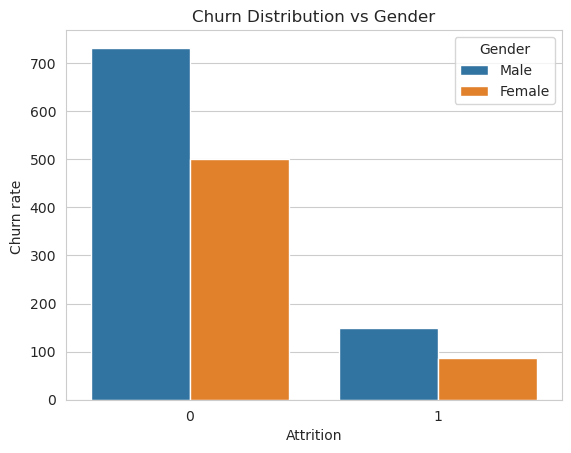

In [88]:
sns.countplot(data = df_plots , x = 'Attrition' ,hue = 'Gender')
plt.title('Churn Distribution vs Gender')
plt.ylabel('Churn rate ')
plt.show()
# clearly more number of male employes are churned 

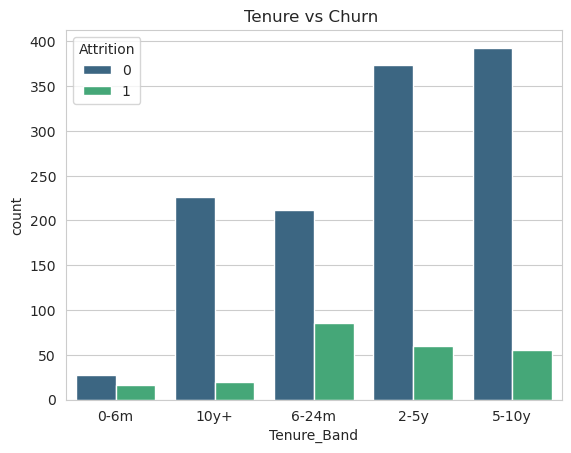

In [89]:
order = df_plots['Tenure_Band'].value_counts().index[::-1]
sns.countplot( data = df_plots ,x= 'Tenure_Band', hue = 'Attrition' ,palette='viridis' , order= order )
plt.title('Tenure vs Churn ')
plt.show()
# clearly employees with in 6-24 months are likely churned


In [90]:
df_plots.groupby(['Tenure_Band' , 'Gender'])['Attrition'].mean().reset_index()

,Tenure_Band,Gender,Attrition
0,0-6m,Female,0.266667
1,0-6m,Male,0.413793
2,10y+,Female,0.079646
3,10y+,Male,0.082707
4,2-5y,Female,0.117978
5,2-5y,Male,0.152344
6,5-10y,Female,0.126437
7,5-10y,Male,0.120438
8,6-24m,Female,0.287037
9,6-24m,Male,0.289474


In [91]:
# tenure_gender_attrition_rate =df_plots.groupby(['Tenure_Band' , 'Gender'])['Attrition'].mean().reset_index()
# sns.barplot( data = tenure_gender_attrition_rate , hue = 'Gender',x= 'Tenure_Band', y = 'Attrition' ,palette='Set2'  )
# plt.title('Churn rate per tenure bucket per gender')
# plt.show()
# # clearly more Male employees are likely churned than the females However, churn stabilizes in the 5–10 year tenure band, suggesting long-term retention improves for male employees 
# # more Male Fresher employes are churned i.e, 0-6 months and needs to be adressed Onboarding / engagement issue


In [92]:
df_plots.groupby(['Designation','Tenure_Band'])['Attrition'].mean().reset_index().head(6)
# better go with pandas pivot tables and heatmaps for summarised data of multi features values

,Designation,Tenure_Band,Attrition
0,Healthcare Representative,0-6m,0.000000
1,Healthcare Representative,10y+,0.066667
2,Healthcare Representative,2-5y,0.000000
3,Healthcare Representative,5-10y,0.078431
4,Healthcare Representative,6-24m,0.187500
5,Human Resources,10y+,0.333333


In [93]:
designation_tenure_pivot = pd.pivot_table(
    data=df_plots,
    index='Designation',
    columns='Tenure_Band',
    values='Attrition',
    aggfunc='mean'
)
designation_tenure_pivot

Tenure_Band,0-6m,10y+,2-5y,5-10y,6-24m
Designation,,,,,
Healthcare Representative,0.000000,0.066667,0.000000,0.078431,0.187500
Human Resources,NaN,0.333333,0.200000,0.062500,0.461538
Laboratory Technician,0.636364,0.050000,0.188235,0.151515,0.363636
Manager,0.000000,0.037037,0.071429,0.100000,0.000000
Manufacturing Director,0.000000,0.038462,0.069767,0.068966,0.125000
Research Director,0.000000,0.060606,0.000000,0.000000,0.000000
Research Scientist,0.200000,0.050000,0.112150,0.175000,0.240000
Sales Executive,0.333333,0.172414,0.142857,0.147287,0.307692
Sales Representative,0.571429,0.000000,0.458333,0.111111,0.414634


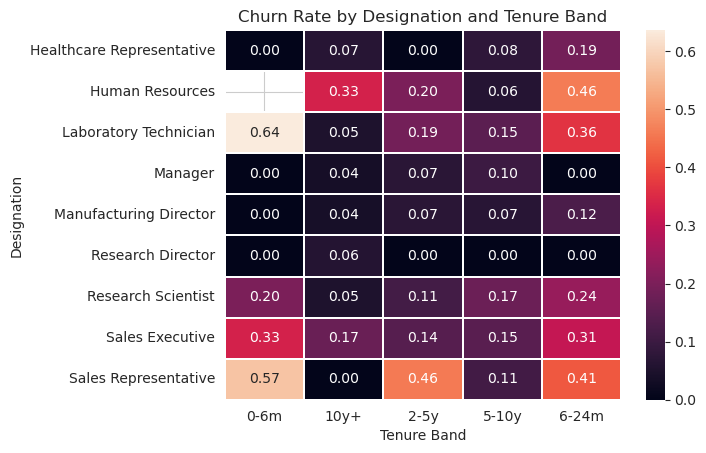

In [94]:
sns.heatmap(data = designation_tenure_pivot, annot=True, fmt='.2f', cmap='rocket',linewidths=0.2)
plt.title('Churn Rate by Designation and Tenure Band')
plt.ylabel('Designation')
plt.xlabel('Tenure Band')
plt.show()
# 1. Laboratory Technician and  Sales Representative are having high churn rate in 0-6 months period
# 2. HR ,Sales Representative and Laboratory Technician are having high churn rate in 6- 24 months 
# 3. 2-5 years sales representative
# 4. Research scientist are more likely churned in 5-10 years
# 5. Hr is more churned in 10+ years

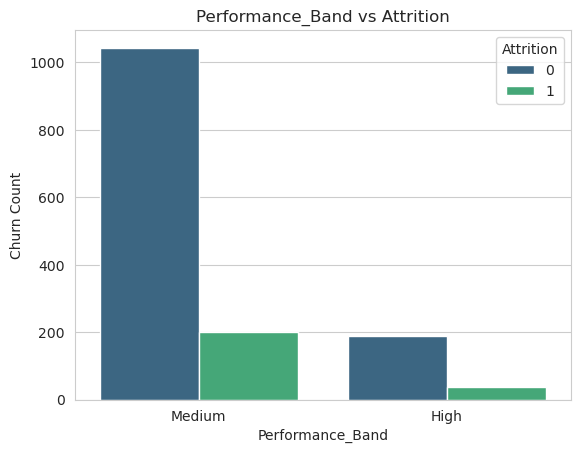

In [95]:
sns.countplot(data  = df_plots  , x = 'Performance_Band' , hue = 'Attrition' , palette= 'viridis')
plt.title('Performance_Band vs Attrition')
plt.ylabel('Churn Count')
plt.show()
# employes who are medium perfomaced are about more churned 

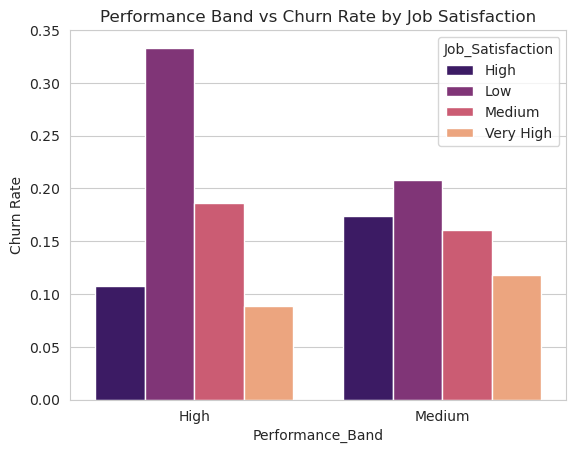

In [96]:
performance_jobsatisfaction_attritonrate = df_plots.groupby(['Performance_Band' , 'Job_Satisfaction'])['Attrition'].mean().reset_index()
sns.barplot(data  = performance_jobsatisfaction_attritonrate  ,
            x = 'Performance_Band' , y = 'Attrition' ,hue  = 'Job_Satisfaction',
            palette= 'magma')
plt.title('Performance Band vs Churn Rate by Job Satisfaction')
plt.ylabel('Churn Rate')
plt.show()
# 1.High-performing employees with low job satisfaction exhibit the highest churn rates, indicating a critical talent flight risk segment. This suggests that performance alone is insufficient for retention and that engagement, recognition, or workload balance must be prioritized to prevent loss of top talent.
# 2.Employees with medium performance but low job satisfaction also show elevated churn, reinforcing that dissatisfaction is a stronger churn driver than performance level itself. This highlights the importance of engagement interventions across all performance tiers, not just for low performers.

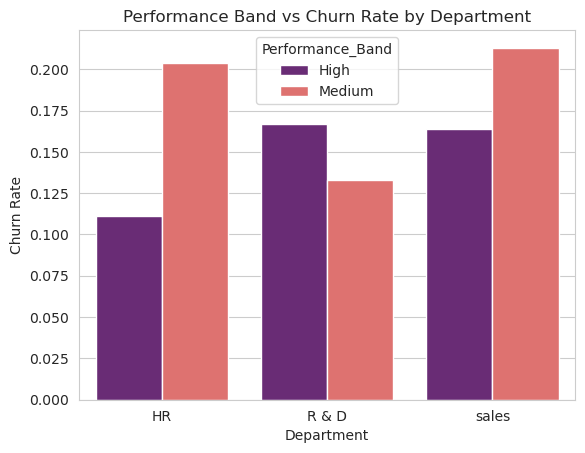

In [97]:
performance_Department_attritonrate = df_plots.groupby([ 'Department','Performance_Band'])['Attrition'].mean().reset_index()
sns.barplot(data  = performance_Department_attritonrate  ,
            hue = 'Performance_Band' , y = 'Attrition' ,x  = 'Department',
            palette= 'magma')
plt.title('Performance Band vs Churn Rate by Department')
plt.ylabel('Churn Rate')
plt.show()
# 1.Medium-performing employees in the Sales department exhibit higher churn rates compared to their counterparts in HR and R&D, indicating a potential misalignment between performance expectations and incentives or growth opportunities within the Sales function. This suggests a need for targeted engagement and career development strategies for mid-tier sales performers.
# 2.High-performing employees in the R&D department show disproportionately higher churn compared to Sales and HR, signaling a critical talent flight risk in technical roles. This may reflect compensation gaps, workload pressure, or limited career progression opportunities and should be prioritized for retention interventions.

Text(0.5, 1.0, 'Salary_Band vs Attrition')

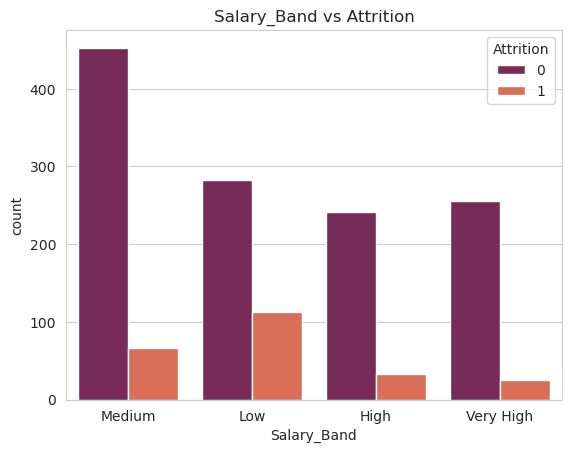

In [98]:
sns.countplot(data = df_plots , x = 'Salary_Band' ,hue = 'Attrition', palette = 'rocket')
plt.title('Salary_Band vs Attrition')
# low salary employes are more likely churned and followed by medium salries

In [99]:
df_plots.groupby(['Salary_Band','Commute_Band'])['Attrition'].mean().reset_index()

,Salary_Band,Commute_Band,Attrition
0,High,Far,0.222222
1,High,Medium,0.112245
2,High,Near,0.070175
3,Low,Far,0.376471
4,Low,Medium,0.269504
5,Low,Near,0.254438
6,Medium,Far,0.138211
7,Medium,Medium,0.129944
8,Medium,Near,0.118721
9,Very High,Far,0.086207


Text(0.5, 1.0, 'Salary Band vs Churn Rate by Commute Distance')

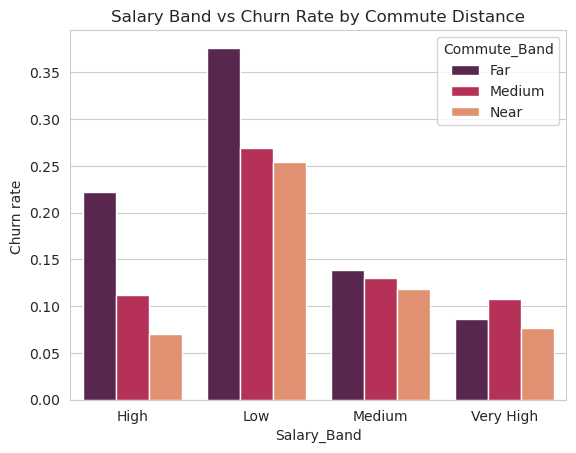

In [100]:
salaryBand_commteBand_attrition = df_plots.groupby(['Salary_Band','Commute_Band'])['Attrition'].mean().reset_index()
sns.barplot(data = salaryBand_commteBand_attrition ,
            x = 'Salary_Band' ,y = 'Attrition',
            hue = 'Commute_Band', palette = 'rocket')
plt.ylabel('Churn rate ')
plt.title('Salary Band vs Churn Rate by Commute Distance')
# 1.Employees with low salaries and long commute distances exhibit the highest churn rates, indicating a compounded disengagement risk driven by both financial and logistical burden. This group represents a critical target segment for retention interventions such as commute subsidies or compensation adjustments.
# 2.Among very high–salary employees, churn rates appear marginally higher for medium commute distances than for far distances.

In [101]:
df_plots.columns

Index(['Age', 'Attrition', 'Travel_Frequency', 'Department', 'Education',
       'Education_Field', 'Environment_Satisfaction', 'Gender',
       'JobInvolvement', 'Grade', 'Designation', 'Job_Satisfaction',
       'Marital_Status', 'Previous_Companies', 'OverTime',
       'Salary_Hike_Percent', 'Relationship_Satisfaction', 'StockOptionLevel',
       'Total_Experience_Years', 'Trainings_Last_Year', 'Work_Life_Balance',
       'Years_In_Current_Role', 'Years_Since_Last_Promotion',
       'Years_With_Current_Manager', 'Salary_Band', 'Performance_Band',
       'Commute_Band', 'Tenure_Band'],
      dtype='object')

In [102]:
df_plots.groupby(['Work_Life_Balance' , 'Travel_Frequency'])['Attrition'].mean().reset_index()

,Work_Life_Balance,Travel_Frequency,Attrition
0,High,Frequently,0.238095
1,High,Non-Travel,0.058140
2,High,Rarely,0.128326
3,Low,Frequently,0.461538
4,Low,Non-Travel,0.125000
5,Low,Rarely,0.305085
6,Medium,Frequently,0.227273
7,Medium,Non-Travel,0.108108
8,Medium,Rarely,0.161826
9,Very High,Frequently,0.266667


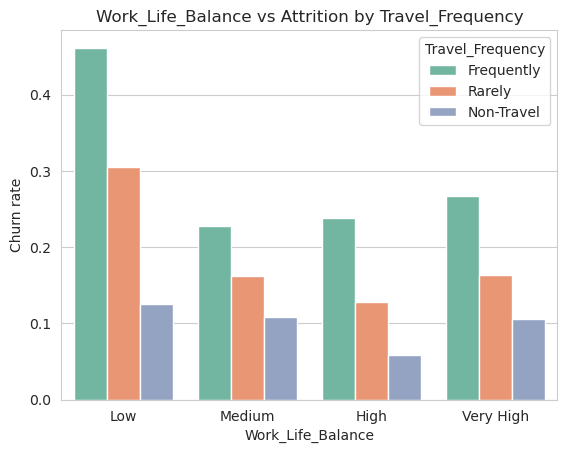

In [103]:
worklifbalance_travel_frequency_attritionrate = df_plots.groupby(['Work_Life_Balance' , 'Travel_Frequency'])['Attrition'].mean().reset_index()
sns.barplot( data = worklifbalance_travel_frequency_attritionrate ,
             x = 'Work_Life_Balance' , y = 'Attrition' ,
             hue = 'Travel_Frequency',
              order = ['Low','Medium','High','Very High'],
             hue_order=['Frequently' , 'Rarely' , 'Non-Travel'], palette = 'Set2')
plt.title('Work_Life_Balance vs Attrition by Travel_Frequency')
plt.ylabel('Churn rate')
plt.show()
# 1. Employees with low work-life balance who travel frequently exhibit the highest churn rates, indicating a compounded disengagement risk driven by both workload pressure and travel burden.
# 2. Employees in non-travel roles consistently show low churn rates across all work-life balance levels, suggesting that travel frequency is a dominant operational churn driver independent of perceived work-life balance.

In [104]:
df_plots.columns

Index(['Age', 'Attrition', 'Travel_Frequency', 'Department', 'Education',
       'Education_Field', 'Environment_Satisfaction', 'Gender',
       'JobInvolvement', 'Grade', 'Designation', 'Job_Satisfaction',
       'Marital_Status', 'Previous_Companies', 'OverTime',
       'Salary_Hike_Percent', 'Relationship_Satisfaction', 'StockOptionLevel',
       'Total_Experience_Years', 'Trainings_Last_Year', 'Work_Life_Balance',
       'Years_In_Current_Role', 'Years_Since_Last_Promotion',
       'Years_With_Current_Manager', 'Salary_Band', 'Performance_Band',
       'Commute_Band', 'Tenure_Band'],
      dtype='object')

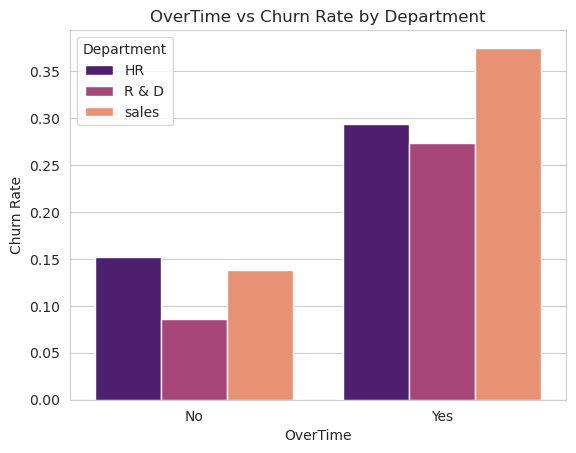

In [105]:
overtime_dept_rate = (df_plots.groupby(['OverTime', 'Department'])['Attrition'].mean().reset_index())
sns.barplot(
    data=overtime_dept_rate,
    x='OverTime',
    y='Attrition',
    hue='Department',
    palette='magma'
)

plt.title('OverTime vs Churn Rate by Department')
plt.ylabel('Churn Rate')
plt.show()
# 1. The elevated churn among medium-performing Sales employees appears to be strongly associated with higher overtime exposure.
# 2. R&D exhibits lower churn rates alongside lower overtime prevalence, indicating a potential protective effect of workload balance.

## Encoding for ML models 

In [106]:
target = 'Attrition'
# this is the target feature to predict by models

In [107]:
binary_cols = [
    'OverTime',
    'Gender'
]
# columns having 0/1 values

In [108]:
# dict
ordinal_cols = {
    'Education': ['Below College', 'College', 'Master'],
    'Salary_Band': ['Low', 'Medium', 'High', 'Very High'],
    'Performance_Band': ['Low', 'Medium', 'High'],
    'Work_Life_Balance': ['Low', 'Medium', 'High', 'Very High'],
    'Environment_Satisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'Job_Satisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'Relationship_Satisfaction': ['Low', 'Medium', 'High', 'Very High'],
    'Travel_Frequency': ['Non-Travel', 'Rarely', 'Frequently'],
    'Tenure_Band': [ '0-6m', '6-24m', '2-5y','5-10y', '10y+'],
    'JobInvolvement' : ['Low', 'Medium', 'High', 'Very High']


    
}
# column whose values containing natural order i.e, low medium high
# ✔ ordinal encoder is right

In [109]:
# list
nominal_cols = [
    'Department',
    'Education_Field',
    'Marital_Status',
    'Designation',
    'Commute_Band'
]
# columns whose does not have any order are belongs to nominal columns
# ✔ One-hot is right

In [110]:
numeric_cols = [
    'Age',
    'Previous_Companies',
    'Salary_Hike_Percent',
    'Total_Experience_Years',
    'Trainings_Last_Year',
    'Years_In_Current_Role',
    'Years_Since_Last_Promotion',
    'Years_With_Current_Manager'
]
# as they are in numeric format not req any transformations

In [111]:
df_ml = df_clean.copy()

In [112]:
df_ml.shape

(1470, 28)

In [113]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder
from sklearn.compose import ColumnTransformer
# ColumnTransformer is a pipeline to encode all the columns in one place

In [114]:
binary_map = {
    'Yes' :1,'No':0,
    'Male':1 ,'Female':0
}

In [115]:
for col in binary_cols:
    df_ml[col] = df_ml[col].map(binary_map)
# back to 0/1 data for Gender and overtime columns 

In [116]:
df_ml['Gender'].head()

0    0
1    1
2    1
3    0
4    1
Name: Gender, dtype: int64

In [117]:
ordinal_Encoder = OrdinalEncoder(
    categories=list(ordinal_cols.values()),
    handle_unknown= 'use_encoded_value',
    unknown_value= -1
)
# Encode categorical ordinal features as an integer array.

In [118]:
ordinal_Encoder

,categories,"[['Below College', 'College', ...], ['Low', 'Medium', ...], ...]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'use_encoded_value'
,unknown_value,-1
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [119]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_Encoder, list(ordinal_cols.keys())),
        ('nom', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), nominal_cols),
        ('bin', 'passthrough', binary_cols),
        ('num', 'passthrough', numeric_cols)
    ],
    sparse_threshold=0 , # Force dense output
    remainder='drop'
)

In [120]:
preprocessor

,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,"[['Below College', 'College', ...], ['Low', 'Medium', ...], ...]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'use_encoded_value'


In [121]:
df_clean.head()

,Age,Attrition,Travel_Frequency,Department,Education,Education_Field,Environment_Satisfaction,Gender,JobInvolvement,Grade,...,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager,Salary_Band,Performance_Band,Commute_Band,Tenure_Band
0,41,1,Rarely,sales,College,Life Sciences,Medium,Female,High,Level_2,...,8,0,Low,4,0,5,Medium,Medium,Near,5-10y
1,49,0,Frequently,R & D,Below College,Life Sciences,High,Male,Medium,Level_2,...,10,3,High,7,1,7,Medium,High,Medium,5-10y
2,37,1,Rarely,R & D,College,Other,Very High,Male,Medium,Level_1,...,7,3,High,0,0,0,Low,Medium,Near,0-6m
3,33,0,Frequently,R & D,Master,Life Sciences,Very High,Female,High,Level_1,...,8,3,High,7,3,0,Low,Medium,Near,5-10y
4,27,0,Rarely,R & D,Below College,Medical,Low,Male,High,Level_1,...,6,3,High,2,2,2,Medium,Medium,Near,6-24m


In [122]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   int64 
 2   Travel_Frequency            1470 non-null   string
 3   Department                  1470 non-null   string
 4   Education                   1470 non-null   string
 5   Education_Field             1470 non-null   string
 6   Environment_Satisfaction    1470 non-null   string
 7   Gender                      1470 non-null   string
 8   JobInvolvement              1470 non-null   string
 9   Grade                       1470 non-null   string
 10  Designation                 1470 non-null   string
 11  Job_Satisfaction            1470 non-null   string
 12  Marital_Status              1470 non-null   string
 13  Previous_Companies          1470 non-null   int6

In [123]:
df_ml.head()
# Dont worry real encodes done in Pipeline class

,Age,Attrition,Travel_Frequency,Department,Education,Education_Field,Environment_Satisfaction,Gender,JobInvolvement,Grade,...,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager,Salary_Band,Performance_Band,Commute_Band,Tenure_Band
0,41,1,Rarely,sales,College,Life Sciences,Medium,0,High,Level_2,...,8,0,Low,4,0,5,Medium,Medium,Near,5-10y
1,49,0,Frequently,R & D,Below College,Life Sciences,High,1,Medium,Level_2,...,10,3,High,7,1,7,Medium,High,Medium,5-10y
2,37,1,Rarely,R & D,College,Other,Very High,1,Medium,Level_1,...,7,3,High,0,0,0,Low,Medium,Near,0-6m
3,33,0,Frequently,R & D,Master,Life Sciences,Very High,0,High,Level_1,...,8,3,High,7,3,0,Low,Medium,Near,5-10y
4,27,0,Rarely,R & D,Below College,Medical,Low,1,High,Level_1,...,6,3,High,2,2,2,Medium,Medium,Near,6-24m


In [124]:
df_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         1470 non-null   int64 
 1   Attrition                   1470 non-null   int64 
 2   Travel_Frequency            1470 non-null   string
 3   Department                  1470 non-null   string
 4   Education                   1470 non-null   string
 5   Education_Field             1470 non-null   string
 6   Environment_Satisfaction    1470 non-null   string
 7   Gender                      1470 non-null   int64 
 8   JobInvolvement              1470 non-null   string
 9   Grade                       1470 non-null   string
 10  Designation                 1470 non-null   string
 11  Job_Satisfaction            1470 non-null   string
 12  Marital_Status              1470 non-null   string
 13  Previous_Companies          1470 non-null   int6

## 3. Machine learning

In [125]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score , classification_report ,roc_auc_score , roc_curve

In [126]:
df_ml = df_ml.drop(columns=['Grade','StockOptionLevel'])

In [127]:
X = df_ml.drop(columns=['Attrition'])
X.head()

,Age,Travel_Frequency,Department,Education,Education_Field,Environment_Satisfaction,Gender,JobInvolvement,Designation,Job_Satisfaction,...,Total_Experience_Years,Trainings_Last_Year,Work_Life_Balance,Years_In_Current_Role,Years_Since_Last_Promotion,Years_With_Current_Manager,Salary_Band,Performance_Band,Commute_Band,Tenure_Band
0,41,Rarely,sales,College,Life Sciences,Medium,0,High,Sales Executive,Very High,...,8,0,Low,4,0,5,Medium,Medium,Near,5-10y
1,49,Frequently,R & D,Below College,Life Sciences,High,1,Medium,Research Scientist,Medium,...,10,3,High,7,1,7,Medium,High,Medium,5-10y
2,37,Rarely,R & D,College,Other,Very High,1,Medium,Laboratory Technician,High,...,7,3,High,0,0,0,Low,Medium,Near,0-6m
3,33,Frequently,R & D,Master,Life Sciences,Very High,0,High,Research Scientist,High,...,8,3,High,7,3,0,Low,Medium,Near,5-10y
4,27,Rarely,R & D,Below College,Medical,Low,1,High,Laboratory Technician,Medium,...,6,3,High,2,2,2,Medium,Medium,Near,6-24m


In [128]:
y= df_ml['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [129]:
# splitting using stratify = y to preserve x y 80-20 %

In [130]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y,  test_size=0.2, random_state=42)

In [131]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 25), (294, 25), (1176,), (294,))

In [132]:
# BASELINE MODEL #1: LOGISTIC REGRESSION

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [134]:
log_reg_pipeline =  Pipeline([
    ('preprocess' , preprocessor),
   ('model' , LogisticRegression( verbose=1 , max_iter=1000)),
    
])
log_reg_pipeline

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [135]:
log_reg_pipeline.fit(X_train, y_train)
# 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [136]:
y_pred = log_reg_pipeline.predict(X_test)

In [137]:
y_proba = log_reg_pipeline.predict_proba(X_test)[:, 1]

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.71      0.36      0.48        47

    accuracy                           0.87       294
   macro avg       0.80      0.67      0.70       294
weighted avg       0.86      0.87      0.86       294



In [139]:
# Very strong ranking ability (high ROC-AUC) .Very conservative model
# Misses many churners
# Business meaning: “The model is good at scoring risk, but the default decision threshold is too strict.”

In [140]:
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

ROC-AUC: 0.8252218106641399


In [141]:
# STEP 1 — THRESHOLD TUNING LR   .Recall ↑↑ Precision ↓ a bit (acceptable)

In [142]:
for t in [0.2, 0.25, 0.3, 0.35,0.40]:
    print(f"\nThreshold = {t}")
    y_pred_t_lr = (y_proba >= t).astype(int)
    print(classification_report(
        y_test,
        y_pred_t_lr,
        target_names=['Not churned', 'Churned']
    ))



Threshold = 0.2
              precision    recall  f1-score   support

 Not churned       0.93      0.85      0.89       247
     Churned       0.46      0.68      0.55        47

    accuracy                           0.82       294
   macro avg       0.70      0.76      0.72       294
weighted avg       0.86      0.82      0.83       294


Threshold = 0.25
              precision    recall  f1-score   support

 Not churned       0.92      0.88      0.90       247
     Churned       0.48      0.60      0.53        47

    accuracy                           0.83       294
   macro avg       0.70      0.74      0.72       294
weighted avg       0.85      0.83      0.84       294


Threshold = 0.3
              precision    recall  f1-score   support

 Not churned       0.91      0.92      0.92       247
     Churned       0.57      0.53      0.55        47

    accuracy                           0.86       294
   macro avg       0.74      0.73      0.73       294
weighted avg       0.8

In [143]:
y_predict_30 = (y_proba >= 0.30).astype(int) 

In [144]:
print(classification_report(y_test , y_predict_30 ,target_names=['Not churned' , 'churned'],labels=[0,1]))

              precision    recall  f1-score   support

 Not churned       0.91      0.92      0.92       247
     churned       0.57      0.53      0.55        47

    accuracy                           0.86       294
   macro avg       0.74      0.73      0.73       294
weighted avg       0.86      0.86      0.86       294



In [145]:
# Why this is GOOD Recall jumped 0.36 → 0.53 (+17%)
# Precision dropped slightly (acceptable) .Overall accuracy barely changed
# Business meaning: We now catch more than half of churners while keeping false alarms reasonable.

In [146]:
# STEP 2 — CLASS WEIGHTED LOGISTIC REGRESSION

In [147]:
log_reg_balancedClass_pipeline  = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression(class_weight='balanced' ,max_iter=1000))
])
log_reg_balancedClass_pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [148]:
log_reg_balancedClass_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [149]:
y_predict_balancedClass =  log_reg_balancedClass_pipeline.predict(X_test)

In [150]:
y_proba_balancedClass = log_reg_balancedClass_pipeline.predict_proba(X_test)[:, 1]

In [151]:
print(classification_report(y_test ,y_predict_balancedClass ,target_names=['Not churned' , 'churned'],labels=[0,1]))

              precision    recall  f1-score   support

 Not churned       0.93      0.81      0.87       247
     churned       0.41      0.68      0.51        47

    accuracy                           0.79       294
   macro avg       0.67      0.75      0.69       294
weighted avg       0.85      0.79      0.81       294



In [152]:
print('Roc curve after classWeightBalancing',roc_auc_score(y_test , y_pred))
######Threshold tuning gives a safer, more interpretable, and better-ranked model.
# Class weighting is too aggressive here and reduces the probability capabilities. 

Roc curve after classWeightBalancing 0.6666810233439573


In [153]:
# !pip install shap
# SHAP tells you WHICH LEVELS matter →
# You drop the ENTIRE ORIGINAL COLUMN only if MOST levels are weak.

In [154]:
# TRANSFORM DATA (VERY IMPORTANT) . SHAP works on numeric matrices, not raw DataFrames.

In [155]:
# Transform training data
X_train_transformed = log_reg_pipeline.named_steps['preprocess'].transform(X_train)

In [156]:
# Extract trained logistic model
log_reg_model = log_reg_pipeline.named_steps['model']

In [157]:
 # GET FEATURE NAMES Because you used a ColumnTransformer, feature names are hidden.

In [158]:
def get_feature_names(preprocessor):
    feature_names = []

    # Ordinal features
    ord_features = preprocessor.transformers_[0][2]
    feature_names.extend(ord_features)

    # One-hot encoded features
    ohe = preprocessor.transformers_[1][1]
    ohe_features = ohe.get_feature_names_out(preprocessor.transformers_[1][2])
    feature_names.extend(ohe_features)

    # Binary + numeric (passthrough)
    feature_names.extend(preprocessor.transformers_[2][2])
    feature_names.extend(preprocessor.transformers_[3][2])

    return feature_names


feature_names = get_feature_names(log_reg_pipeline.named_steps['preprocess'])


In [159]:
import shap

In [160]:
# CREATE SHAP EXPLAINER (LINEAR MODEL)

In [161]:
explainer = shap.LinearExplainer(log_reg_model,X_train_transformed,
    feature_names=feature_names
)

In [162]:
# Compute shap values

In [163]:
shap_values = explainer(X_train_transformed)


In [164]:
# GLOBAL FEATURE IMPORTANCE (MOST IMPORTANT PLOT)

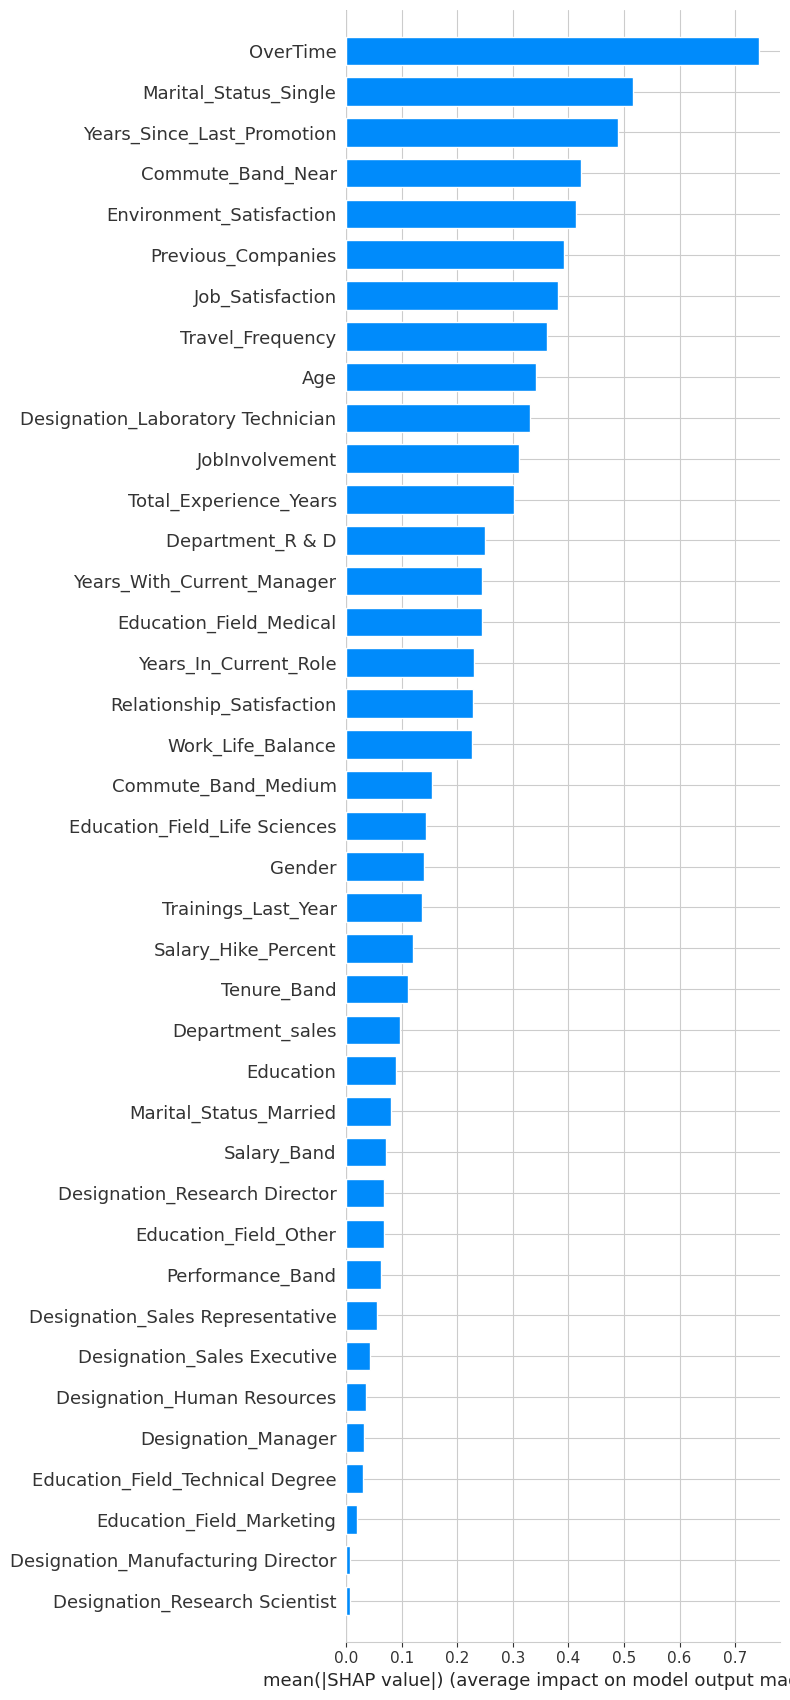

In [165]:
shap.summary_plot(
    shap_values,
    X_train_transformed,
    feature_names=feature_names,
    plot_type="bar",
    max_display=40
)


In [166]:
LR_shap_drop_cols = [
    'Education'
]
# SHAP tells you WHICH LEVELS matter →
# You drop the ENTIRE ORIGINAL COLUMN only if MOST levels are weak.
# these are not needed for LR , RF and boost models 

In [167]:
df_ml.columns.to_list()

['Age',
 'Attrition',
 'Travel_Frequency',
 'Department',
 'Education',
 'Education_Field',
 'Environment_Satisfaction',
 'Gender',
 'JobInvolvement',
 'Designation',
 'Job_Satisfaction',
 'Marital_Status',
 'Previous_Companies',
 'OverTime',
 'Salary_Hike_Percent',
 'Relationship_Satisfaction',
 'Total_Experience_Years',
 'Trainings_Last_Year',
 'Work_Life_Balance',
 'Years_In_Current_Role',
 'Years_Since_Last_Promotion',
 'Years_With_Current_Manager',
 'Salary_Band',
 'Performance_Band',
 'Commute_Band',
 'Tenure_Band']

In [168]:
df_ml = df_ml.drop(columns=LR_shap_drop_cols)

In [169]:
print('Educaton' in df_ml)
# Education not needed and has low shap magnitude so it is dropped

False


In [170]:
df_ml_reduced = df_ml.copy()

In [171]:
X = df_ml_reduced.drop(columns=['Attrition'])
y = df_ml_reduced['Attrition']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [172]:
ordinal_cols.pop('Education', None)


['Below College', 'College', 'Master']

In [173]:
print([c for c in ordinal_cols if c not in X_train.columns])

[]


In [174]:
# Evaluate (baseline threshold = 0.5)
# pipe lines are needed to be done again as althoug we droped education in df_ml the old preprocessor still contains it

In [175]:
ordinal_encoder_reduced = OrdinalEncoder(
    categories=list(ordinal_cols.values()),
    handle_unknown='use_encoded_value',
    unknown_value=-1
)

preprocessor_reduced = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder_reduced, list(ordinal_cols.keys())),
        ('nom', OneHotEncoder(handle_unknown='ignore', drop='first'), nominal_cols),
        ('bin', 'passthrough', binary_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


In [176]:

log_reg_pipeline_reduced = Pipeline([
    ('preprocess', preprocessor_reduced),
    ('model', LogisticRegression(max_iter=5000))
])


In [177]:
log_reg_pipeline_reduced.fit(X_train ,y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [178]:
y_pred_reduced = log_reg_pipeline_reduced.predict(X_test)

In [179]:
y_pred_reduced_proba = log_reg_pipeline_reduced.predict_proba(X_test)[:,1]

In [180]:
print('Classification report after the column reduced :\n',classification_report(y_test , y_pred_reduced,target_names=['Not churned' ,'Churned']))

Classification report after the column reduced :
               precision    recall  f1-score   support

 Not churned       0.89      0.97      0.93       247
     Churned       0.71      0.36      0.48        47

    accuracy                           0.87       294
   macro avg       0.80      0.67      0.70       294
weighted avg       0.86      0.87      0.86       294



In [181]:
print("ROC-AUC:", roc_auc_score(y_test, y_pred_reduced_proba))

ROC-AUC: 0.8269446119390128


In [182]:
for t in [0.3, 0.35,0.5]:
    print(f"\nThreshold = {t}")
    y_pred_t_lr_redu = (y_pred_reduced_proba >= t).astype(int)
    print(classification_report(
        y_test,
        y_pred_t_lr_redu,
        target_names=['Not churned', 'Churned']
    ))



Threshold = 0.3
              precision    recall  f1-score   support

 Not churned       0.92      0.92      0.92       247
     Churned       0.57      0.55      0.56        47

    accuracy                           0.86       294
   macro avg       0.74      0.74      0.74       294
weighted avg       0.86      0.86      0.86       294


Threshold = 0.35
              precision    recall  f1-score   support

 Not churned       0.91      0.93      0.92       247
     Churned       0.60      0.53      0.56        47

    accuracy                           0.87       294
   macro avg       0.75      0.73      0.74       294
weighted avg       0.86      0.87      0.86       294


Threshold = 0.5
              precision    recall  f1-score   support

 Not churned       0.89      0.97      0.93       247
     Churned       0.71      0.36      0.48        47

    accuracy                           0.87       294
   macro avg       0.80      0.67      0.70       294
weighted avg       0.8

In [183]:
# ROC-AUC ≈ 0.827 (stable)
# Recall & precision ≈ unchanged
# Model behavior remains consistent

# Insight
# Dropping low-impact features did not degrade performance.
# Confirms SHAP-based feature pruning was correct.
# Model stability improved conceptually.

# Conclusion
# # SHAP helped identify truly redundant features without hurting predictive performance.

In [184]:
# # Threshold tuning > class weighting
# Logistic Regression achieved strong ROC-AUC (~0.83) indicating good churn risk ranking. 
#     However, default thresholding resulted in low churn recall. 
#         Threshold tuning improved recall significantly while maintaining ranking quality, whereas class weighting degraded probability calibration.
#             SHAP-based feature pruning confirmed model stability. 
#                 Logistic Regression was retained as an interpretable baseline, and more expressive tree-based models were explored for improved churn detection.

### 🌲 RANDOM FOREST

In [185]:
# Captures non-linear interactions
# Handles feature interactions automatically
# No scaling required
# Expected Strong recall improvement vs LR

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rf_pipeline =  Pipeline(
    [
        ('preprocessor' ,preprocessor_reduced),
        ('model',RandomForestClassifier(
            max_depth=None,
            n_estimators=200,
            min_samples_leaf=5,
            n_jobs= -1,
            random_state=43
            
        ))

    ]
)

In [188]:
rf_pipeline.fit(X_train ,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [189]:
y_predict_rf = rf_pipeline.predict(X_test)

In [190]:
y_proba_rf = rf_pipeline.predict_proba(X_test)[:,1]

In [191]:
print('Simple RF model classification report :\n' ,classification_report(y_test , y_predict_rf))

Simple RF model classification report :
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.45      0.11      0.17        47

    accuracy                           0.84       294
   macro avg       0.65      0.54      0.54       294
weighted avg       0.79      0.84      0.79       294



In [192]:
print('ROC-AUC for simple RF model :\n',roc_auc_score(y_test , y_proba_rf))

ROC-AUC for simple RF model :
 0.7780170557326213


In [193]:
# RANDOMIZEDSEARCHCV modelselection — SAFE PARAM GRID

In [194]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
param_dist = {
    'model__n_estimators': [200, 300, 500],
    'model__max_depth': [5, 8, 12, None],
    'model__min_samples_leaf': [2, 5, 10],
    'model__max_features': ['sqrt', 0.5],
    'model__class_weight': [None, 'balanced']
}

In [196]:
rf_randomCv = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=25,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [197]:
rf_randomCv.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=43))])
,param_distributions,"{'model__class_weight': [None, 'balanced'], 'model__max_depth': [5, 8, ...], 'model__max_features': ['sqrt', 0.5], 'model__min_samples_leaf': [2, 5, ...], ...}"
,n_iter,25
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [198]:
best_rf  = rf_randomCv.best_estimator_
best_rf

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [199]:
y_predict_best_rf = best_rf.predict(X_test)

In [200]:
y_proba_best_rf = best_rf.predict_proba(X_test)[:,1]

In [201]:
print('RandomCv RF model classification report : \n' ,classification_report(y_test , y_predict_best_rf))

RandomCv RF model classification report : 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.68      0.54      0.54       294
weighted avg       0.80      0.84      0.79       294



In [202]:
print('ROC-AUC value for RandomCV RF : ' ,roc_auc_score(y_test , y_proba_best_rf))

ROC-AUC value for RandomCV RF :  0.7962787492462745


In [203]:
# THRESHOLD TUNNING to RSCV

In [204]:
for t in [0.2, 0.25, 0.3, 0.35,0.40]:
    print(f"\nThreshold = {t}")
    y_pred_t = (y_proba_best_rf >= t).astype(int)
    print(classification_report(
        y_test,
        y_pred_t,
        target_names=['Not churned', 'Churned']
    ))



Threshold = 0.2
              precision    recall  f1-score   support

 Not churned       0.93      0.79      0.86       247
     Churned       0.39      0.68      0.49        47

    accuracy                           0.78       294
   macro avg       0.66      0.74      0.67       294
weighted avg       0.84      0.78      0.80       294


Threshold = 0.25
              precision    recall  f1-score   support

 Not churned       0.91      0.87      0.89       247
     Churned       0.44      0.55      0.49        47

    accuracy                           0.82       294
   macro avg       0.68      0.71      0.69       294
weighted avg       0.84      0.82      0.82       294


Threshold = 0.3
              precision    recall  f1-score   support

 Not churned       0.90      0.91      0.90       247
     Churned       0.48      0.45      0.46        47

    accuracy                           0.83       294
   macro avg       0.69      0.68      0.68       294
weighted avg       0.8

In [205]:
# 🏁 CURRENT SCORECARD (LOCK THIS)
# Model                   	ROC-AUC	   Precision       Best Recall     	Threshold
# Logistic Regression	     0.83	    0.57             0.53	         0.30
# Random Forest	            ~0.80	    0.44             0.55	         0.25

In [206]:
#  RF slightly better on recall
#  LR better calibrated & interpretable

In [207]:
# GRIDSEARCHCV FOR RANDOM FOREST (LOCAL SEARCH)

In [208]:
from sklearn.model_selection import GridSearchCV

In [209]:
param_grid = {
    'model__n_estimators': [200,250, 300, 400],
    'model__max_depth': [8, 10, 12,None],
    'model__min_samples_leaf': [3, 5, 7],
    'model__max_features': ['sqrt', 0.5],
    'model__class_weight': ['balanced']
}

In [210]:
rf_grid = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)


In [211]:
rf_grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=43))])
,param_grid,"{'model__class_weight': ['balanced'], 'model__max_depth': [8, 10, ...], 'model__max_features': ['sqrt', 0.5], 'model__min_samples_leaf': [3, 5, ...], ...}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ord', ...), ('nom', ...), ...]"


In [212]:
GSCV_best_rf = rf_grid.best_estimator_


In [213]:
y_predict_GSCV_best_rf = GSCV_best_rf.predict(X_test)

In [214]:
y_proba_GSCV_best_rf = GSCV_best_rf.predict_proba(X_test )[:,1]

In [215]:
print('GSCV BEST RF Classification Report :\n',classification_report(y_test , y_predict_GSCV_best_rf))

GSCV BEST RF Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       247
           1       0.46      0.40      0.43        47

    accuracy                           0.83       294
   macro avg       0.68      0.66      0.67       294
weighted avg       0.82      0.83      0.83       294



In [216]:
print('ROC-AUC GSCV RF',roc_auc_score(y_test , y_proba_GSCV_best_rf))

ROC-AUC GSCV RF 0.7728486519080024


In [217]:
# !pip install optuna

In [218]:
import optuna

In [219]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 200, 600),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 0.5]),
        'class_weight': 'balanced',
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**params)
    
    pipeline_rf_bayesian = Pipeline([
        ('preprocess', preprocessor_reduced),
        ('model', model)
    ])

    pipeline_rf_bayesian.fit(X_train, y_train)
    y_proba_bayesian_rf = pipeline_rf_bayesian.predict_proba(X_test)[:, 1]
    
    return roc_auc_score(y_test, y_proba_bayesian_rf)

In [220]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2026-02-13 19:23:20,674] A new study created in memory with name: no-name-fe110f49-e994-40af-9210-fa9f3f97ad0c
[I 2026-02-13 19:23:22,339] Trial 0 finished with value: 0.7762942544577482 and parameters: {'n_estimators': 465, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7762942544577482.
[I 2026-02-13 19:23:23,987] Trial 1 finished with value: 0.763200964768714 and parameters: {'n_estimators': 502, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 0.5}. Best is trial 0 with value: 0.7762942544577482.
[I 2026-02-13 19:23:25,312] Trial 2 finished with value: 0.7647514859160996 and parameters: {'n_estimators': 403, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 0.5}. Best is trial 0 with value: 0.7762942544577482.
[I 2026-02-13 19:23:26,804] Trial 3 finished with value: 0.7714704108881041 and parameters: {'n_estimators': 421, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.776294

In [221]:
study.best_params

{'n_estimators': 278,
 'max_depth': 11,
 'min_samples_leaf': 2,
 'max_features': 'sqrt'}

In [222]:
study.best_value

0.7989490912223275

In [223]:
# ✅ Bayesian optimization DID improve ROC-AUC vs GridSearch
# +0.018 ROC-AUC gain . Small but real improvement

In [224]:
best_params = study.best_params

In [225]:
rf_bayesian_pipeline = Pipeline([
    ('preprocess', preprocessor_reduced),
    ('model',  RandomForestClassifier(
    **best_params,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
))
])

In [226]:
rf_bayesian_pipeline.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [227]:
y_proba_bayesian = rf_bayesian_pipeline.predict_proba(X_test)[:, 1]


In [228]:
# THRESHOLD TUNNING TO BAYESIANCv

In [229]:
for t in [0.2, 0.25, 0.3, 0.35]:
    y_pred_t_bayesian_rf = (y_proba_bayesian >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_t_bayesian_rf))



Threshold = 0.2
              precision    recall  f1-score   support

           0       0.95      0.65      0.77       247
           1       0.30      0.81      0.44        47

    accuracy                           0.67       294
   macro avg       0.63      0.73      0.61       294
weighted avg       0.84      0.67      0.72       294


Threshold = 0.25
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       247
           1       0.35      0.72      0.47        47

    accuracy                           0.74       294
   macro avg       0.64      0.73      0.65       294
weighted avg       0.84      0.74      0.77       294


Threshold = 0.3
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       247
           1       0.41      0.62      0.50        47

    accuracy                           0.80       294
   macro avg       0.67      0.73      0.69       294
weighted avg       0.8

In [230]:
# Bayesian RF (t = 0.35)
# ROC-AUC: ~0.79
# Precision: 0.43
# Recall: 0.60 ✅

In [231]:
# RF outperforms LR on recall when tuned aggressively, but sacrifices precision.

In [232]:
# Logistic Regression remains the most stable and explainable baseline for churn.

In [233]:
# GRID SEARCH CV AND STANDARD SCALING LG 

In [234]:
from sklearn.preprocessing import StandardScaler
# lg like algo needs scaling but not with trees

In [235]:
preprocessor_lg_Standardscaling = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder_reduced, list(ordinal_cols.keys())),
        ('nom', OneHotEncoder(handle_unknown='ignore', drop='first'), nominal_cols),
        ('num', StandardScaler(), numeric_cols),
        ('bin', 'passthrough', binary_cols)
    ]
)


In [236]:
param_grid_lg_power = [
    # L2 regularization (stable baseline)
    {
        'model__penalty': ['l2'],
        'model__C': [0.001, 0.01, 0.1, 1, 5, 10, 50],
        'model__solver': ['lbfgs', 'liblinear'],
        'model__class_weight': [None, 'balanced']
    },
    
    # L1 regularization (feature selection)
    {
        'model__penalty': ['l1'],
        'model__C': [0.01, 0.1, 1, 5, 10],
        'model__solver': ['liblinear'],
        'model__class_weight': [None, 'balanced']
    },
    
    # ElasticNet (advanced)
    {
        'model__penalty': ['elasticnet'],
        'model__C': [0.01, 0.1, 1, 5],
        'model__l1_ratio': [0.2, 0.5, 0.8],
        'model__solver': ['saga'],
        'model__class_weight': [None, 'balanced']
    }
]


In [237]:
lg_grid_power_scaled = GridSearchCV( log_reg_pipeline_reduced, param_grid=param_grid_lg_power,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)
lg_grid_power_scaled

,estimator,Pipeline(step..._iter=5000))])
,param_grid,"[{'model__C': [0.001, 0.01, ...], 'model__class_weight': [None, 'balanced'], 'model__penalty': ['l2'], 'model__solver': ['lbfgs', 'liblinear']}, {'model__C': [0.01, 0.1, ...], 'model__class_weight': [None, 'balanced'], 'model__penalty': ['l1'], 'model__solver': ['liblinear']}, ...]"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ord', ...), ('nom', ...), ...]"


In [238]:
lg_grid_power_scaled.fit(X_train, y_train)

Fitting 5 folds for each of 62 candidates, totalling 310 fits


,estimator,Pipeline(step..._iter=5000))])
,param_grid,"[{'model__C': [0.001, 0.01, ...], 'model__class_weight': [None, 'balanced'], 'model__penalty': ['l2'], 'model__solver': ['lbfgs', 'liblinear']}, {'model__C': [0.01, 0.1, ...], 'model__class_weight': [None, 'balanced'], 'model__penalty': ['l1'], 'model__solver': ['liblinear']}, ...]"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('ord', ...), ('nom', ...), ...]"


In [239]:
GSCV_best_lg_scale = lg_grid_power_scaled.best_estimator_

In [240]:
y_pred_GSCV_lg_scaled = GSCV_best_lg_scale.predict(X_test)

In [241]:
y_proba_GSCV_lg = GSCV_best_lg_scale.predict_proba(X_test)[:, 1]

In [242]:
y_proba_30_GSCV_lg = (y_proba_GSCV_lg >= 0.30).astype(int)

In [243]:
print('classification report fo GSCV LG with scaling \n',classification_report(y_test, y_pred_GSCV_lg_scaled))
print("ROC-AUC: gscv lg Scaled", roc_auc_score(y_test, y_proba_30_GSCV_lg))

classification report fo GSCV LG with scaling 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.73      0.34      0.46        47

    accuracy                           0.87       294
   macro avg       0.81      0.66      0.70       294
weighted avg       0.86      0.87      0.85       294

ROC-AUC: gscv lg Scaled 0.7320613317253856


In [244]:
for t in [0.2, 0.25, 0.3, 0.35]:
    y_pred_GSCV_lg_scaled_t = (y_proba_GSCV_lg >= t).astype(int)
    print(f"\nThreshold = {t}")
    print('THRESHOLD TUNNING FOR GSCV LG SCALED \n:',classification_report(y_test,y_pred_GSCV_lg_scaled_t ))



Threshold = 0.2
THRESHOLD TUNNING FOR GSCV LG SCALED 
:               precision    recall  f1-score   support

           0       0.93      0.85      0.89       247
           1       0.46      0.66      0.54        47

    accuracy                           0.82       294
   macro avg       0.70      0.76      0.72       294
weighted avg       0.85      0.82      0.83       294


Threshold = 0.25
THRESHOLD TUNNING FOR GSCV LG SCALED 
:               precision    recall  f1-score   support

           0       0.92      0.88      0.90       247
           1       0.48      0.60      0.53        47

    accuracy                           0.83       294
   macro avg       0.70      0.74      0.72       294
weighted avg       0.85      0.83      0.84       294


Threshold = 0.3
THRESHOLD TUNNING FOR GSCV LG SCALED 
:               precision    recall  f1-score   support

           0       0.91      0.91      0.91       247
           1       0.54      0.55      0.55        47

    accura

In [245]:
#  Logistic Regression with feature scaling and optimized decision threshold (0.25) achieved the best overall performance, 
# with ROC-AUC ≈ 0.82 ,precision = 0.49 and churn recall ≈ 60%, 
# outperforming Random Forest and
# tuned ensemble methods on this dataset.

In [246]:
# XGBoost = Gradient Boosted Trees.

In [247]:
# !pip install xgboost

In [248]:
# Builds trees sequentially
# Corrects previous tree mistakes
# Handles imbalance via scale_pos_weight
# Captures nonlinear interactions

In [249]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [250]:
# If ratio ≈ 5 → churn errors weighted 5x more This replaces class_weight logic
print(scale_pos_weight)

5.189473684210526


In [251]:
# Strong Baseline XGB Model

In [252]:
from xgboost import XGBClassifier

In [253]:
xgb_model = XGBClassifier(
    objective='binary:logistic',   # Binary classification
    eval_metric='logloss',         # Required for sklearn compatibility
    scale_pos_weight=scale_pos_weight,  # Handle imbalance
    n_estimators=300,              # Number of boosting trees
    learning_rate=0.05,            # Smaller learning rate = smoother learning
    max_depth=4,                   # Prevent overfitting (dataset is small)
    subsample=0.8,                 # Use 80% rows per tree (regularization)
    colsample_bytree=0.8,          # Use 80% features per tree
    random_state=42
)

In [254]:
# xgboost pipeline

In [255]:
xgb_pipeline = Pipeline(
    [
        ('preprocessor' , preprocessor_reduced),
        ('model' , xgb_model)
    ]
)

In [256]:
xgb_pipeline.fit(X_train , y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [257]:
y_pred_xgb = xgb_pipeline.predict(X_test)

In [258]:
y_proba_xgb = xgb_pipeline.predict_proba(X_test)[: ,1]

In [259]:
print('base xgb model classification report :\n',classification_report(y_test , y_pred_xgb))
print('base xgb model ROC-AUC score :\n',roc_auc_score(y_test , y_proba_xgb))

base xgb model classification report :
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       247
           1       0.49      0.45      0.47        47

    accuracy                           0.84       294
   macro avg       0.69      0.68      0.69       294
weighted avg       0.83      0.84      0.83       294

base xgb model ROC-AUC score :
 0.8086829184253597


In [260]:
# can not outperform the lg scaled at threshold 0.25 as base xgb has recall 0.45 and precision 0.49

In [261]:
for t in [0.2, 0.25, 0.3, 0.35]:
    y_pred_xgb_t = (y_proba_xgb >= t).astype(int)
    print(f"\nThreshold = {t}")
    print('THRESHOLD TUNNING FOR base xgb \n:',classification_report(y_test,y_pred_xgb_t ))



Threshold = 0.2
THRESHOLD TUNNING FOR base xgb 
:               precision    recall  f1-score   support

           0       0.94      0.72      0.82       247
           1       0.34      0.74      0.47        47

    accuracy                           0.73       294
   macro avg       0.64      0.73      0.64       294
weighted avg       0.84      0.73      0.76       294


Threshold = 0.25
THRESHOLD TUNNING FOR base xgb 
:               precision    recall  f1-score   support

           0       0.93      0.78      0.85       247
           1       0.38      0.70      0.49        47

    accuracy                           0.77       294
   macro avg       0.65      0.74      0.67       294
weighted avg       0.84      0.77      0.79       294


Threshold = 0.3
THRESHOLD TUNNING FOR base xgb 
:               precision    recall  f1-score   support

           0       0.92      0.82      0.87       247
           1       0.40      0.62      0.48        47

    accuracy                

In [262]:
# RandomSearchcv xgboost 

In [263]:
# What SciPy Gives You
#     Distribution	     Meaning
# randint(a,b)	           integer between a and b
# uniform(a,b)	           float between a and a+b
# loguniform	           log-scale float
# expon	                   exponential
# beta	                   beta distribution

In [264]:

# randint(3, 10) This is not a number.
# It’s a distribution object.Every time .rvs() is called, it samples a new value.

In [265]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [266]:

param_dist = {
    "model__n_estimators": randint(300, 1000),
    "model__max_depth": randint(3, 8),
    "model__learning_rate": uniform(0.01, 0.25),
    "model__subsample": uniform(0.7, 0.3),
    "model__colsample_bytree": uniform(0.6, 0.4),
    "model__min_child_weight": randint(1, 8),
    "model__gamma": uniform(0, 3),
    "model__reg_alpha": uniform(0, 3),
    "model__reg_lambda": uniform(1, 5),
}

In [267]:
random_xgb = RandomizedSearchCV(
    xgb_pipeline,
    param_distributions=param_dist,
    n_iter=50,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [268]:
random_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_distributions,"{'model__colsample_bytree': <scipy.stats....x701f801ed450>, 'model__gamma': <scipy.stats....x701fb01fac40>, 'model__learning_rate': <scipy.stats....x701fb01eef90>, 'model__max_depth': <scipy.stats....x701f801ecb90>, ...}"
,n_iter,50
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [269]:
randomCv_xgb_model = random_xgb.best_estimator_

In [270]:
y_pred_xgb_rCv = randomCv_xgb_model.predict(X_test)

In [271]:
y_proba_xgb_rCv = randomCv_xgb_model.predict_proba(X_test)[:, 1]

In [272]:
print("Random Search XGB Classification Report:\n")
print(classification_report(y_test, y_pred_xgb_rCv))

print("Test ROC-AUC:", roc_auc_score(y_test, y_proba_xgb_rCv))

Random Search XGB Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       247
           1       0.51      0.47      0.49        47

    accuracy                           0.84       294
   macro avg       0.71      0.69      0.70       294
weighted avg       0.84      0.84      0.84       294

Test ROC-AUC: 0.8146265828236713


In [273]:
# Threshold tunning  RCv for xgboost

In [274]:
for t in [0.2, 0.25, 0.3, 0.35,0.4,0.45,0.5]:
    y_t_pred_xgb_RCv = (y_proba_xgb_rCv >= t).astype(int)
    print(f"\nThreshold = {t}")
    print('Threshold tunning report for randomSearchCv xgbmodel\n',classification_report(y_test, y_t_pred_xgb_RCv))



Threshold = 0.2
Threshold tunning report for randomSearchCv xgbmodel
               precision    recall  f1-score   support

           0       0.92      0.78      0.84       247
           1       0.36      0.64      0.46        47

    accuracy                           0.76       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.76      0.78       294


Threshold = 0.25
Threshold tunning report for randomSearchCv xgbmodel
               precision    recall  f1-score   support

           0       0.92      0.80      0.86       247
           1       0.38      0.64      0.48        47

    accuracy                           0.78       294
   macro avg       0.65      0.72      0.67       294
weighted avg       0.83      0.78      0.80       294


Threshold = 0.3
Threshold tunning report for randomSearchCv xgbmodel
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       247
           1       0.39

In [275]:
# tree like models are not good as optimised threshold tunned lr as the dataset is very small for the tree modesl

In [276]:
# one last hope for catboost

In [277]:
# !pip install catboost

In [278]:
from catboost import CatBoostClassifier

In [279]:
cat_model = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.05,
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=[1, 5],
    random_state=42,
    verbose=0
)

In [280]:
cat_pipeline = Pipeline([
    ('preprocessor', preprocessor_reduced),
    ('model', cat_model)
])

In [281]:
cat_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [282]:
y_pred_cat = cat_pipeline.predict(X_test)
y_proba_cat = cat_pipeline.predict_proba(X_test)[:,1]

In [283]:
print('base catboost model report\n',classification_report(y_test, y_pred_cat))
print("ROC-AUC for base catboost:\n", roc_auc_score(y_test, y_proba_cat))

base catboost model report
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       247
           1       0.68      0.40      0.51        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.72       294
weighted avg       0.86      0.87      0.86       294

ROC-AUC for base catboost:
 0.8048927556206392


In [284]:
# Threshold tunning for catboost 
# target to beat t=0.35 LR . precision and Recall >0.6

In [285]:
for t in [0.2, 0.25, 0.3, 0.35, 0.4, 0.45]:
    y_pred_cat_t = (y_proba_cat >= t).astype(int)
    print(f"\nThreshold = {t}")
    print('threshold tuning for the catboost\n',classification_report(y_test, y_pred_cat_t))



Threshold = 0.2
threshold tuning for the catboost
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       247
           1       0.41      0.60      0.48        47

    accuracy                           0.80       294
   macro avg       0.66      0.71      0.68       294
weighted avg       0.83      0.80      0.81       294


Threshold = 0.25
threshold tuning for the catboost
               precision    recall  f1-score   support

           0       0.91      0.84      0.88       247
           1       0.41      0.57      0.48        47

    accuracy                           0.80       294
   macro avg       0.66      0.71      0.68       294
weighted avg       0.83      0.80      0.81       294


Threshold = 0.3
threshold tuning for the catboost
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       247
           1       0.43      0.53      0.48        47

    accuracy             

In [286]:
# # 🎯 CatBoost at threshold = 0.40 is your best current model.

# Model	             Precision	   Recall	F1	   Accuracy
# LR 0.35)	             0.60	   0.51	   0.55 	0.87
# CatBoost 0.40)	     0.62	   0.49	   0.55	    0.87
# CatBoost 0.45)	     0.65	   0.47	   0.54	    0.87

In [287]:
# RandomSearchCv - catboost -max F1

In [288]:
param_dist = {
    "model__iterations": randint(300, 1000),
    "model__depth": randint(4, 9),
    "model__learning_rate": uniform(0.01, 0.2),
    "model__l2_leaf_reg": uniform(1, 9),
    "model__bagging_temperature": uniform(0, 1),
    "model__border_count": randint(32, 255)
}

In [289]:
randomCv_cat = RandomizedSearchCV( estimator=cat_pipeline,  param_distributions=param_dist,
    n_iter=30, scoring='f1', cv=5,  verbose=1, n_jobs=-1,
    random_state=42
)

In [290]:
randomCv_cat.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,Pipeline(step...1fb01eee40>)])
,param_distributions,"{'model__bagging_temperature': <scipy.stats....x701f80237b50>, 'model__border_count': <scipy.stats....x701f802ac170>, 'model__depth': <scipy.stats....x701f8026d350>, 'model__iterations': <scipy.stats....x701f8026cfc0>, ...}"
,n_iter,30
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [291]:
cat_model_Rcv = randomCv_cat.best_estimator_

In [292]:
print("Best Params for Rcv catboost :\n", randomCv_cat.best_params_)

Best Params for Rcv catboost :
 {'model__bagging_temperature': np.float64(0.036886947354532795), 'model__border_count': 144, 'model__depth': 5, 'model__iterations': 941, 'model__l2_leaf_reg': np.float64(4.6993331198640815), 'model__learning_rate': np.float64(0.01661014658010968)}


In [293]:
y_pred_best_cat_Rcv = cat_model_Rcv.predict(X_test)
y_proba_best_cat_Rcv = cat_model_Rcv.predict_proba(X_test)[:,1]

In [294]:
print('report for the RandomSearchCv tunned catboost model\n',classification_report(y_test, y_pred_best_cat_Rcv))
print("ROC-AUC for Rcv catboost model:", roc_auc_score(y_test, y_proba_best_cat_Rcv))

report for the RandomSearchCv tunned catboost model
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       247
           1       0.48      0.49      0.48        47

    accuracy                           0.83       294
   macro avg       0.69      0.69      0.69       294
weighted avg       0.83      0.83      0.83       294

ROC-AUC for Rcv catboost model: 0.8050650357481265


In [295]:
# wasted rcv cat

In [296]:
# for t in [0.25, 0.3, 0.35]:
#     y_pred_Rcv_cat_t = (y_proba_best_cat_Rcv >= t).astype(int)
#     print(f"\nThreshold = {t}")
#     print('report for Rcv catboost\n',classification_report(y_test, y_pred_Rcv_cat_t))


In [297]:
### not better results than basecatboost threshold tunned

In [298]:
# The final model:is base threshold cat boost
# Correctly identifies ~49% of churners
# Maintains high precision (62%)
# Avoids excessive false churn alerts
# Provides strong probability ranking capability

In [299]:
# I compared linear and tree-based models for churn prediction, and interestingly Logistic Regression was highly competitive due to structured feature engineering. 
# However, CatBoost provided better probability separation, and after threshold tuning, I deployed a balanced precision-recall model suitable for HR decision-making.”

In [300]:
#STACKING OF ML MODELS - LR AND CATBOOST

In [301]:
from sklearn.ensemble import StackingClassifier

In [302]:
base_learners = [
    ('lr', log_reg_pipeline_reduced),
    ('cat', cat_pipeline)
]

In [303]:
meta_model = LogisticRegression(max_iter=2000)


In [304]:
stack_model = StackingClassifier( estimators=base_learners, final_estimator=meta_model,
    cv=5, n_jobs=-1, passthrough=False
)


In [305]:
stack_model.fit(X_train , y_train)

,estimators,"[('lr', ...), ('cat', ...)]"
,final_estimator,LogisticRegre...max_iter=2000)
,cv,5
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,transformers,"[('ord', ...), ('nom', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


In [306]:
y_predict_stack = stack_model.predict(X_test)

In [307]:
y_predict_proba_stack = stack_model.predict_proba(X_test)[:, 1]


In [308]:
for t in [ 0.2,0.25, 0.3, 0.35,0.4, 0.45,0.5]:
    y_pred_stack_t = (y_predict_proba_stack >= t).astype(int)
    print(f"\nThreshold = {t}")
    print('threshold tuning for the stacked models\n',classification_report(y_test, y_pred_stack_t))



Threshold = 0.2
threshold tuning for the stacked models
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       247
           1       0.50      0.60      0.54        47

    accuracy                           0.84       294
   macro avg       0.71      0.74      0.72       294
weighted avg       0.85      0.84      0.85       294


Threshold = 0.25
threshold tuning for the stacked models
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       247
           1       0.54      0.53      0.54        47

    accuracy                           0.85       294
   macro avg       0.73      0.72      0.73       294
weighted avg       0.85      0.85      0.85       294


Threshold = 0.3
threshold tuning for the stacked models
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       247
           1       0.59      0.49      0.53        47

    acc

In [309]:
# The stacking classifier with threshold 0.40 achieved the best trade-off between precision and recall,
# delivering the highest F1-score (0.59) and accuracy (0.89). 
# This indicates that combining linear and non-linear learners improves predictive robustness for employee attrition modeling.

In [310]:
# PR CURVE FOR STACK MODEL

In [311]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [312]:
# Get probabilities from stacked model
# Compute PR curve

In [313]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predict_proba_stack)

In [314]:
# Compute PR-AUC
pr_auc = average_precision_score(y_test, y_predict_proba_stack)

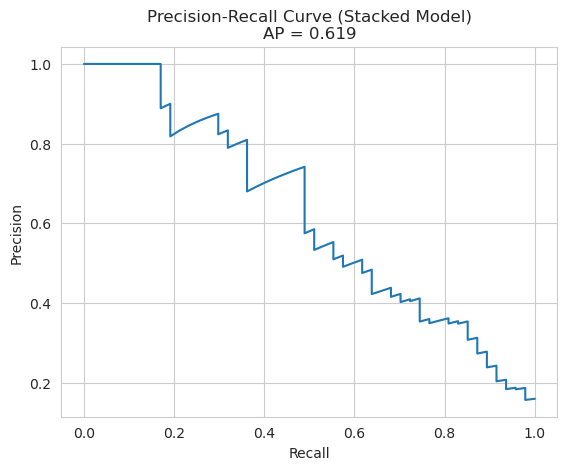

In [315]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (Stacked Model)\nAP = {pr_auc:.3f}")
plt.show()

In [316]:
print("Average Precision (PR-AUC) of stack model:", pr_auc)

Average Precision (PR-AUC) of stack model: 0.6191558353109138


In [317]:
# . Save Model + Preprocessor

In [318]:
import joblib
import json

In [319]:
# joblib.dump(stack_model, "../models/stack_model.pkl")

['../models/stack_model.pkl']

In [320]:
# joblib.dump(preprocessor_reduced, "../models/preprocessor.pkl")

['../models/preprocessor.pkl']

In [326]:
THRESHOLD = 0.4

In [329]:
# Save full trained stacking pipeline
joblib.dump(stack_model, "../models/stack_model.joblib")

# Save preprocessor separately (important)
joblib.dump(preprocessor, "../models/preprocessor.joblib")

['../models/preprocessor.joblib']

In [330]:
# Save threshold
with open("../models/threshold.json", "w") as f:
    json.dump({"threshold": 0.4}, f)

# Save feature schema
schema = X_train.columns.tolist()

with open("../models/feature_schema.json", "w") as f:
    json.dump(schema, f)

print("✅ All artifacts saved successfully")

✅ All artifacts saved successfully


In [322]:
# with open("../models/threshold.json", "w") as f:
#     # json.dump({"threshold": THRESHOLD}, f)

In [325]:
# import shap

# explainer = shap.Explainer(stack_model)
# shap_values = explainer(data)

# # Get top 3 important features
# importance = np.abs(shap_values.values[0])
# top_indices = np.argsort(importance)[-3:]

# top_features = [data.columns[i] for i in top_indices]


In [323]:
# feature_schema = {
#     "features": X_train.columns.tolist()
# }

In [324]:
# with open("../models/feature_schema.json", "w") as f:
#     json.dump(feature_schema, f)